In [4]:
# Importing all the libraries needed
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report
import warnings 
warnings.filterwarnings('ignore')

In [10]:
train_data= 'C:\\Users\\hp\\Downloads\\DSSA\\Sem 3\\Deep Learning\\Assignment\\tomato\\train'
test_data= 'C:\\Users\\hp\\Downloads\\DSSA\\Sem 3\\Deep Learning\\Assignment\\tomato\\val'

In [11]:
# for this challenge we are using ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale=1/255.0,
                               shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                validation_split=0.3)# specifying the validation split inside the function

test_datagen = ImageDataGenerator(rescale=1/255.0,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [12]:
train_gen = train_datagen.flow_from_directory(
                                train_data,
                                target_size=(224, 224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='training')

Found 7000 images belonging to 10 classes.


In [13]:
val_gen = train_datagen.flow_from_directory(
                                train_data,
                                target_size=(224,224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='validation')

Found 3000 images belonging to 10 classes.


In [15]:
test_gen = test_datagen.flow_from_directory(
        test_data,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle = False) #shuffle will not affect the accuracy of the model, but will affect the computation of some metrics that depend on the order of the samples

Found 984 images belonging to 10 classes.


# CNN

In [16]:
# CNN model layers

cnn = models.Sequential()

cnn.add(layers.Conv2D (32, kernel_size = (3,3), activation='relu', input_shape = [224, 224,3])),
cnn.add(layers.MaxPooling2D(pool_size = (2, 2))),

cnn.add(layers.Conv2D(64, (3,3), activation='relu')),
cnn.add(layers. MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D (64, (3,3), activation='relu')),
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers. Conv2D (64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Flatten()),

cnn.add(layers.Dense(64,activation='relu'))
#output layer
cnn.add(layers.Dense(10,activation='softmax'))

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [19]:
opt = keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
es = EarlyStopping(monitor = 'val_accuracy', mode = 'max',  patience = 20, verbose = 1, restore_best_weights = True)

In [21]:
history = cnn.fit(x = train_gen, callbacks = [es],  steps_per_epoch = 7000/32, epochs = 100, validation_steps = 3000/32,
                 validation_data = val_gen)  

Epoch 1/100
218/218 [==============================] - 685s 3s/step - loss: 2.0109 - accuracy: 0.2501 - val_loss: 1.7437 - val_accuracy: 0.3697
Epoch 2/100
218/218 [==============================] - 602s 3s/step - loss: 1.5298 - accuracy: 0.4450 - val_loss: 1.3443 - val_accuracy: 0.5260
Epoch 3/100
218/218 [==============================] - 580s 3s/step - loss: 1.1299 - accuracy: 0.5909 - val_loss: 0.9855 - val_accuracy: 0.6413
Epoch 4/100
218/218 [==============================] - 581s 3s/step - loss: 0.9294 - accuracy: 0.6700 - val_loss: 0.7978 - val_accuracy: 0.7070
Epoch 5/100
218/218 [==============================] - 568s 3s/step - loss: 0.7513 - accuracy: 0.7297 - val_loss: 0.6763 - val_accuracy: 0.7553
Epoch 6/100
218/218 [==============================] - 570s 3s/step - loss: 0.7036 - accuracy: 0.7423 - val_loss: 0.7704 - val_accuracy: 0.7193
Epoch 7/100
218/218 [==============================] - 586s 3s/step - loss: 0.6037 - accuracy: 0.7810 - val_loss: 0.6162 - val_accuracy:

218/218 [==============================] - 585s 3s/step - loss: 0.0757 - accuracy: 0.9716 - val_loss: 0.1903 - val_accuracy: 0.9420
Epoch 58/100
218/218 [==============================] - 582s 3s/step - loss: 0.0778 - accuracy: 0.9741 - val_loss: 0.1732 - val_accuracy: 0.9503
Epoch 59/100
218/218 [==============================] - 578s 3s/step - loss: 0.1000 - accuracy: 0.9671 - val_loss: 0.1933 - val_accuracy: 0.9380
Epoch 60/100
218/218 [==============================] - 561s 3s/step - loss: 0.0929 - accuracy: 0.9673 - val_loss: 0.3131 - val_accuracy: 0.9090
Epoch 61/100
218/218 [==============================] - 547s 3s/step - loss: 0.0778 - accuracy: 0.9721 - val_loss: 0.1974 - val_accuracy: 0.9400
Epoch 62/100
218/218 [==============================] - 656s 3s/step - loss: 0.0970 - accuracy: 0.9683 - val_loss: 0.1482 - val_accuracy: 0.9520
Epoch 63/100
218/218 [==============================] - 545s 2s/step - loss: 0.0689 - accuracy: 0.9757 - val_loss: 0.2101 - val_accuracy: 0.932

In [77]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = cnn.evaluate(test_gen, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

31/31 [==============================] - 33s 1s/step - loss: 0.1755 - accuracy: 0.9492
Test Accuracy: 94.92%


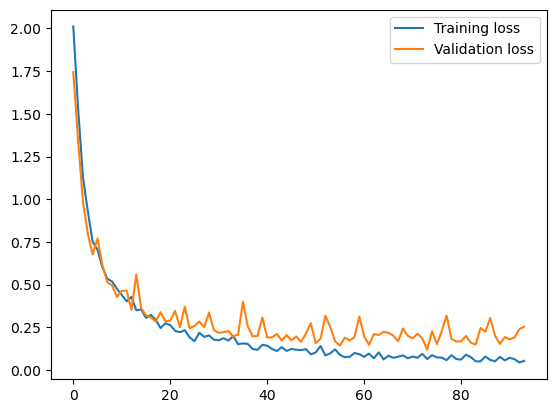

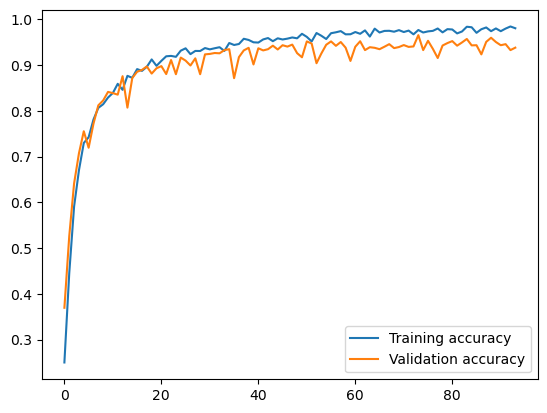

In [23]:
# plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

# RESNET 50

In [43]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [49]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=IMAGE_SIZE,
    batch_size=64,
    class_mode='categorical'
)

valid_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=IMAGE_SIZE,
    batch_size=64,
    class_mode='categorical'
)

Found 10000 images belonging to 10 classes.
Found 984 images belonging to 10 classes.


In [50]:
base_model = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
x = base_model.output
x = Flatten()(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)


model3 = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 56s 1us/step


In [53]:
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [51]:
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model3.fit( train_generator, validation_data=valid_generator, epochs=100, steps_per_epoch=len(train_generator),
    validation_steps=len(valid_generator))

Epoch 1/100
157/157 [==============================] - 1718s 11s/step - loss: 3.4640 - accuracy: 0.2464 - val_loss: 1.9203 - val_accuracy: 0.4136
Epoch 2/100
157/157 [==============================] - 1712s 11s/step - loss: 1.7826 - accuracy: 0.3928 - val_loss: 1.4880 - val_accuracy: 0.4634
Epoch 3/100
157/157 [==============================] - 1712s 11s/step - loss: 1.7463 - accuracy: 0.4340 - val_loss: 1.5689 - val_accuracy: 0.4756
Epoch 4/100
157/157 [==============================] - 1711s 11s/step - loss: 1.5660 - accuracy: 0.4754 - val_loss: 1.5994 - val_accuracy: 0.4685
Epoch 5/100
157/157 [==============================] - 1709s 11s/step - loss: 1.4448 - accuracy: 0.5157 - val_loss: 1.4173 - val_accuracy: 0.5163
Epoch 6/100
157/157 [==============================] - 1708s 11s/step - loss: 1.4133 - accuracy: 0.5282 - val_loss: 1.7649 - val_accuracy: 0.4919
Epoch 7/100
157/157 [==============================] - 1709s 11s/step - loss: 1.3475 - accuracy: 0.5558 - val_loss: 1.6583 -

Epoch 57/100
157/157 [==============================] - 1725s 11s/step - loss: 1.0241 - accuracy: 0.6989 - val_loss: 2.1781 - val_accuracy: 0.5467
Epoch 58/100
157/157 [==============================] - 1731s 11s/step - loss: 0.9003 - accuracy: 0.7091 - val_loss: 2.0814 - val_accuracy: 0.5285
Epoch 59/100
157/157 [==============================] - 1728s 11s/step - loss: 0.8542 - accuracy: 0.7209 - val_loss: 1.3800 - val_accuracy: 0.6372
Epoch 60/100
157/157 [==============================] - 1912s 12s/step - loss: 0.9758 - accuracy: 0.6967 - val_loss: 1.6833 - val_accuracy: 0.5955
Epoch 61/100
157/157 [==============================] - 1998s 13s/step - loss: 0.8340 - accuracy: 0.7213 - val_loss: 1.9523 - val_accuracy: 0.5407
Epoch 62/100
157/157 [==============================] - 1938s 12s/step - loss: 0.9042 - accuracy: 0.7099 - val_loss: 1.9346 - val_accuracy: 0.5762
Epoch 63/100
157/157 [==============================] - 1871s 12s/step - loss: 1.0041 - accuracy: 0.6853 - val_loss: 2

In [76]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model3.evaluate(valid_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


16/16 [==============================] - 180s 11s/step - loss: 1.9534 - accuracy: 0.5986
Test Accuracy: 59.86%


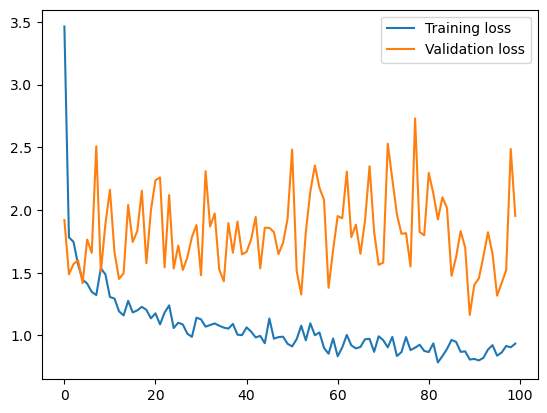

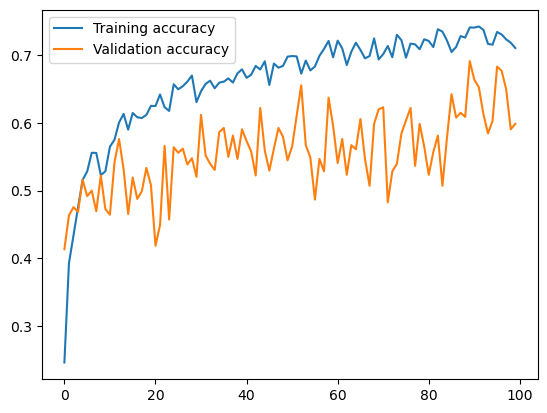

In [52]:
# plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

# INCEPTION V3

In [65]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import InceptionV3

# Define input shape
input_shape = (224, 224, 3)

# Load the InceptionV3 base model (pre-trained on ImageNet)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Add a Global Average Pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add fully connected layers with dropout and batch normalization
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output layer for classification (number of classes)
num_classes = len(train_gen.class_indices)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the model
model5 = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with custom learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3, decay_steps=10000, decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)
model5.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks (including early stopping and model checkpoint)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Train the model
history5 = model5.fit( train_gen, validation_data=val_gen, epochs=50, callbacks=[early_stopping],
    verbose=1
)



Epoch 1/50
219/219 [==============================] - 1283s 6s/step - loss: 1.1032 - accuracy: 0.6376 - val_loss: 0.7724 - val_accuracy: 0.7403
Epoch 2/50
219/219 [==============================] - 1157s 5s/step - loss: 0.7479 - accuracy: 0.7507 - val_loss: 0.6137 - val_accuracy: 0.7920
Epoch 3/50
219/219 [==============================] - 1042s 5s/step - loss: 0.6726 - accuracy: 0.7736 - val_loss: 0.7137 - val_accuracy: 0.7653
Epoch 4/50
219/219 [==============================] - 1151s 5s/step - loss: 0.5983 - accuracy: 0.7946 - val_loss: 0.6079 - val_accuracy: 0.7947
Epoch 5/50
219/219 [==============================] - 1166s 5s/step - loss: 0.5656 - accuracy: 0.8060 - val_loss: 0.6367 - val_accuracy: 0.7843
Epoch 6/50
219/219 [==============================] - 1193s 5s/step - loss: 0.5597 - accuracy: 0.8101 - val_loss: 0.6312 - val_accuracy: 0.7877
Epoch 7/50
219/219 [==============================] - 1143s 5s/step - loss: 0.5405 - accuracy: 0.8167 - val_loss: 0.5226 - val_accuracy:

In [67]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model5.evaluate(test_gen, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


31/31 [==============================] - 114s 4s/step - loss: 0.4803 - accuracy: 0.8537
Test Accuracy: 85.37%


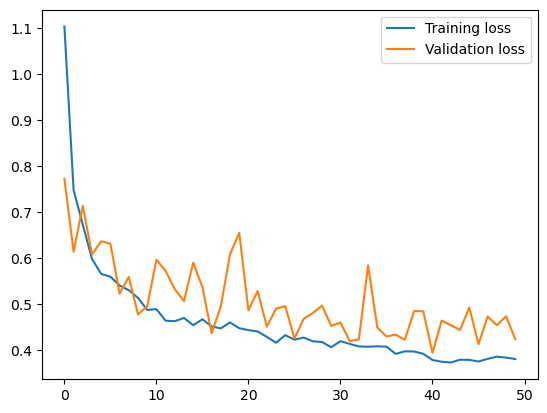

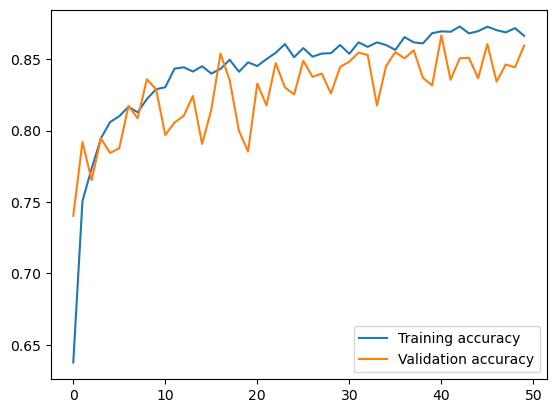

In [72]:
# plot the loss
plt.plot(history5.history['loss'], label='Training loss')
plt.plot(history5.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history5.history['accuracy'], label='Training accuracy')
plt.plot(history5.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

# VGG 19

In [71]:

from tensorflow.keras.applications import VGG19
from tensorflow.keras.regularizers import l2


# Define input shape
input_shape = (224, 224, 3)

# Load the pre-trained VGG19 model (weights='imagenet')
base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom layers for classification on top of the pre-trained model
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu', kernel_regularizer=l2(0.001))(x)  # Add L2 regularization
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu', kernel_regularizer=l2(0.001))(x)  # Add L2 regularization
x = Dropout(0.5)(x)

# Output layer for your specific classification task (number of classes)
num_classes = len(training_set.class_indices)
output_layer = Dense(num_classes, activation='softmax')(x)

# Create the final model for transfer learning
model6 = Model(inputs=base_model.input, outputs=output_layer)

# Freeze the layers of the pre-trained model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with a custom learning rate
'''lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3, decay_steps=10000, decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)'''

model6.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
history6 = model6.fit( train_gen, validation_data=val_gen, epochs=30, verbose=1)


Epoch 1/30
219/219 [==============================] - 7465s 34s/step - loss: 6.3408 - accuracy: 0.3543 - val_loss: 3.1768 - val_accuracy: 0.5583
Epoch 2/30
219/219 [==============================] - 6660s 30s/step - loss: 2.9579 - accuracy: 0.3924 - val_loss: 2.2135 - val_accuracy: 0.5993
Epoch 3/30
219/219 [==============================] - 6714s 31s/step - loss: 2.4676 - accuracy: 0.3696 - val_loss: 2.1919 - val_accuracy: 0.4720
Epoch 4/30
219/219 [==============================] - 6669s 30s/step - loss: 2.3028 - accuracy: 0.3284 - val_loss: 1.8499 - val_accuracy: 0.5373
Epoch 5/30
219/219 [==============================] - 6610s 30s/step - loss: 2.1622 - accuracy: 0.3250 - val_loss: 1.6665 - val_accuracy: 0.5610
Epoch 6/30
219/219 [==============================] - 6667s 30s/step - loss: 2.0410 - accuracy: 0.3350 - val_loss: 1.6749 - val_accuracy: 0.5230
Epoch 7/30
219/219 [==============================] - 6706s 31s/step - loss: 1.8930 - accuracy: 0.3681 - val_loss: 1.5740 - val_ac

In [74]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model6.evaluate(test_gen, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


31/31 [==============================] - 601s 19s/step - loss: 2.0448 - accuracy: 0.3608
Test Accuracy: 36.08%


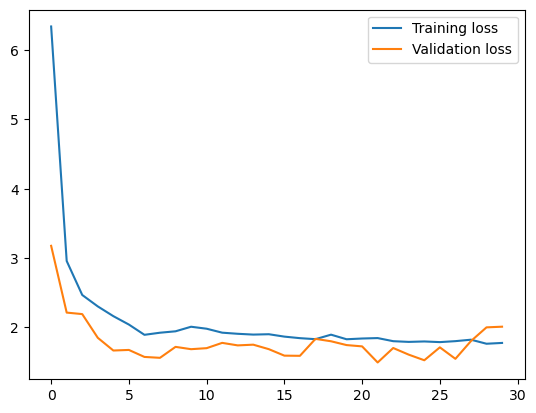

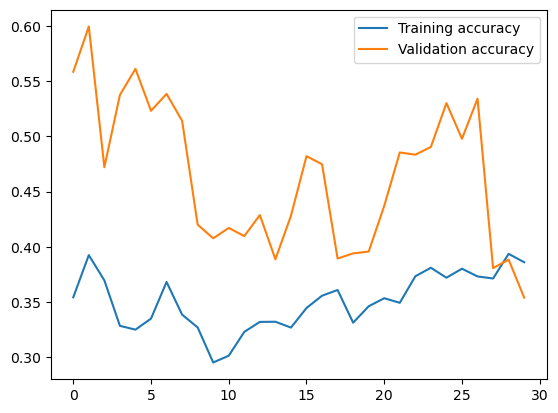

In [75]:
# plot the loss
plt.plot(history6.history['loss'], label='Training loss')
plt.plot(history6.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history6.history['accuracy'], label='Training accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

# COMPARISON OF MODELS FOR BEST ACCURACY

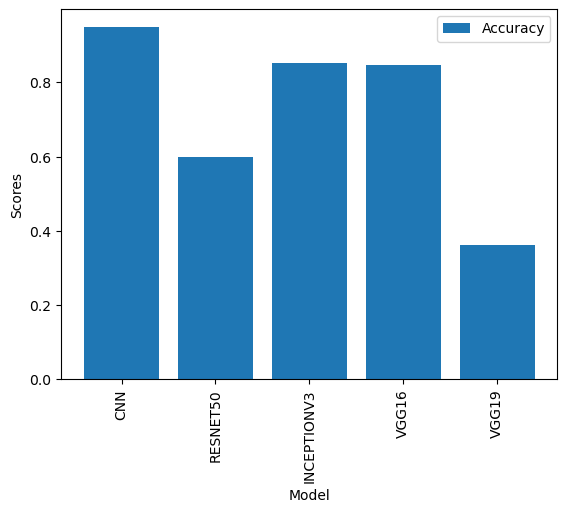

In [78]:
x=['CNN','RESNET50', 'INCEPTIONV3', 'VGG16', 'VGG19']
y=[0.9492,0.5986,0.8537,0.8476,0.3608]
plt.bar(x,y)
plt.xticks(x,rotation ='vertical')
plt.legend(['Accuracy'])
plt.xlabel("Model")
plt.ylabel("Scores")
plt.show()

## SAVING THE MODEL
- As we can see, CNN model has the best performance among all models thus we will be using it for the prediction of unseen data.

In [80]:
# Save the trained model
cnn.save("cnn_model.h5")
